In [50]:
from data.echogram import DataReaderZarr, get_data_readers
import numpy as np
from tqdm import tqdm
import dask
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_closing
from scipy import stats as st
from pandas.plotting import scatter_matrix
import xarray as xr
import seaborn as sns

dask.config.set(**{'array.slicing.split_large_chunks': False})

#  Path to surveys
survey_path = 'C:/Users/apa055/Desktop/data/2019' #'/Users/apa055/Desktop/data'

#  Get list of relevant surveys
surveys = ['/S2019847/ACOUSTIC/GRIDDED/S2019847_sv.zarr']
readers = [DataReaderZarr(survey_path + zarr_file) for zarr_file in surveys]

# Or alternatively ...
# readers = get_data_readers()

patch_size = (256, 256)  # x, y
survey = readers[0]

In [16]:
survey.get_objects_file()

Generating objects file with seabed distances ... 


,ID,object,type,category,proportion,startping,endping,startpingindex,endpingindex,upperdepth,lowerdepth,upperdepthindex,lowerdepthindex,distance_to_seabed,valid_object
0,1__Layer-None,1,Layer-None,-1.0,1,2019-05-11 00:27:05.798000,2019-05-11 04:25:31.313000,0,40599,10.000000,122.707650,0,809,NaN,False
1,2__School-6705,2,School-6705,-1.0,1,2019-05-11 04:41:50.157000,2019-05-11 04:41:55.438000,43384,43399,115.156400,115.726265,551,577,NaN,False
2,3__School-6706,3,School-6706,-1.0,1,2019-05-11 04:41:57.188000,2019-05-11 04:42:05.626000,43404,43428,118.598854,118.903660,552,589,NaN,False
3,4__Layer-None,4,Layer-None,-1.0,1,2019-05-11 04:25:31.673000,2019-05-11 04:55:51.470000,40600,45778,10.000000,123.066840,0,618,NaN,False
4,5__School-6707,5,School-6707,-1.0,1,2019-05-11 05:09:34.157000,2019-05-11 05:09:52.798000,48119,48172,107.916664,109.056370,484,540,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1201__School-7892,1201,School-7892,27.0,1,2019-05-11 19:38:04.673000,2019-05-11 19:38:12.407000,196307,196329,102.787070,103.356926,495,506,-3.0,True
1201,1202__School-7893,1202,School-7893,1.0,1,2019-05-11 19:38:07.485000,2019-05-11 19:38:10.298000,196315,196323,100.881050,101.071000,488,494,9.0,True
1202,1203__School-7894,1203,School-7894,27.0,1,2019-05-11 19:38:12.766000,2019-05-11 19:38:17.688000,196330,196344,102.855900,103.425760,500,505,-1.0,True
1203,1204__Layer-6772,1204,Layer-6772,-1.0,1,2019-05-11 19:13:54.079000,2019-05-11 19:41:13.766000,192181,196845,10.000000,99.503876,5,529,NaN,False


In [51]:
survey.fish_categories

[1, 27, 6009]

In [52]:
for i in survey.fish_categories:
    print(f'Number of {i} is equal to {survey.annotation.annotation.sel(category=i).sum().values}')

Number of 1 is equal to 1069979.0
Number of 27 is equal to 1561904.0
Number of 6009 is equal to 69792.0


In [59]:
survey.shape[0]*survey.shape[1] - 1069979 - 1561904 - 69792

10493100851

In [103]:
ot, sd, ps, bg = 1069979,  1561904, 69792, 10493100851
summary = np.array([['ot', 'sd', 'ps', 'bg'],[ot, sd, ps, bg]]).T

In [104]:
print (round(ot/bg*100,2), round(sd/bg*100, 2), round(ps/bg*100, 2), round(bg/(bg+ot+sd+ps)*100, 2))

0.01 0.01 0.0 99.97


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


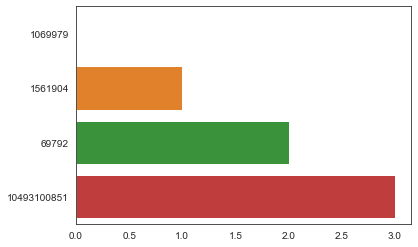

In [106]:
def plot_sns(raw_data):
  data = np.array(raw_data)
  x = np.arange(len(raw_data))
  sns.axes_style('white')
  sns.set_style('white')
  ax = sns.barplot(x, data[:,1])
  plt.show()

plot_sns(summary)

In [107]:
summary

array([['ot', '1069979'],
       ['sd', '1561904'],
       ['ps', '69792'],
       ['bg', '10493100851']], dtype='<U21')

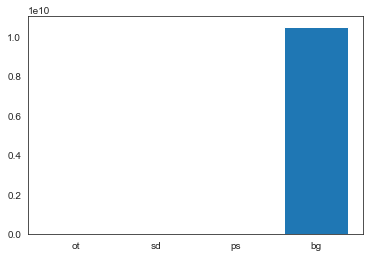

In [118]:

plt.bar(summary[:,0], height=summary[:,1].astype('float'))
plt.show()